In [ ]:
pwd

'/home/wsuser/work'

In [ ]:
!pip install keras==2.2.4

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [ ]:
!pip install tensorflow

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [ ]:
from keras.models import Sequential # api, se,
from keras.layers import Dense # add Layers
from keras.layers import Convolution2D # con
from keras.layers import MaxPooling2D#
from keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range= 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0sBA5-eNOECDz_2B_idSZgOSa6xD-KFjEsnplQeNqE32',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'detectingparkinsonsdiseaseusingma-donotdelete-pr-npbsjba7teyq9v'
object_key = 'drawings.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [ ]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_3.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [ ]:
pwd

'/home/wsuser/work'

In [ ]:
import os
filename = os.listdir('/home/wsuser/work/spiral_wave/training')

In [ ]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/spiral_wave/training/",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("/home/wsuser/work/spiral_wave/training/",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 143 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [ ]:
x_train.class_indices

{'healthy': 0, 'parkinson': 1}

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = "relu"))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units = 128, activation = "relu"))

In [ ]:
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model.fit(x_train,validation_data=x_test,epochs=5,batch_size=32)

Epoch 1/5
5/5 [==============================] - 2s 265ms/step - loss: 4.7947 - accuracy: 0.4476 - val_loss: 2.5271 - val_accuracy: 0.4965
Epoch 2/5
5/5 [==============================] - 1s 210ms/step - loss: 1.6676 - accuracy: 0.4965 - val_loss: 0.6927 - val_accuracy: 0.5105
Epoch 3/5
5/5 [==============================] - 1s 250ms/step - loss: 0.7877 - accuracy: 0.5035 - val_loss: 0.7417 - val_accuracy: 0.5035
Epoch 4/5
5/5 [==============================] - 1s 214ms/step - loss: 0.7168 - accuracy: 0.5035 - val_loss: 0.6949 - val_accuracy: 0.5035
Epoch 5/5
5/5 [==============================] - 1s 212ms/step - loss: 0.6950 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5035


In [ ]:
model.save("parkinson.h5")

In [ ]:
!tar -zcvf image-classification-model_new.tgz parkinson.h5

parkinson.h5


In [ ]:
ls -1

image-classification-model_new.tgz
my__model.tar.gz
my_model.tar.gz
parkinson.h5
parkinson.pkl
spiral_wave/


In [ ]:
!pip install watson-machine-learning-client --upgrade

In [ ]:
#Replace the credentials that you got from watson Machine Learning Service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey": "8QLMqsHMjuR6Z0k647bSq0cesTXqS0PX83hcb60OdJhP"
                  }
client = APIClient(wml_credentials)

In [ ]:
client = APIClient(wml_credentials)

In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client, 'Detecting Parkinson Disease Using Machine Learning')
print("Space UID = " + space_uid)

Space UID = edb8e45d-9b5f-4ee6-b9e6-9cf791c31343


In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [ ]:
 model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={ 
     client.repository.ModelMetaNames.NAME: "CNN",
     client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [ ]:
model_id

'97fa0983-99d1-45ae-ac33-a10b867faebd'

In [ ]:
client.repository.download(model_id, 'my.model.tar.gz')

Successfully saved model content to file: 'my.model.tar.gz'


'/home/wsuser/work/my.model.tar.gz'

#Image Pre-processing
Importing the necessary libraries

In [ ]:
!pip install imutils

In [ ]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skimage import feature
from imutils import paths
import os
import pickle

##Functions to load and quantify the images

In [ ]:
def quantify_image(image):
    features = feature.hog(image, 
                           orientations=9, 
                           pixels_per_cell=(10,10), 
                           cells_per_block=(2,2), 
                           transform_sqrt=True, 
                           block_norm="L1")
    return features

In [ ]:
def load_split(path):
    path_images = list(paths.list_images(path))
    data=[]
    labels=[]

    for path_image in path_images:
        label = path_image.split(os.path.sep)[-2]
        image = cv2.imread(path_image)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200,200))
        image = cv2.threshold(image,0,225,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        features = quantify_image(image)
        data.append(features)
        labels.append(label)

    return (np.array(data), np.array(labels))

#Using spiral & Wave images
##Defining the path for training data and testing data

In [ ]:
path_training_data = r"/home/wsuser/work/spiral_wave/training"
path_testing_data = r"/home/wsuser/work/spiral_wave/testing"

In [ ]:
(x_train, y_train) = load_split(path_training_data)
(x_test, y_test) = load_split(path_testing_data)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train

array([[0.03251708, 0.        , 0.01149653, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_train

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parki

In [ ]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01075467, 0.        , 0.01520941, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_test

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson'],
      dtype='<U9')

##Label Encoding

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(x_train.shape, y_train.shape)

(143, 12996) (143,)


In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#MODEL BUILDING
###Training the Model

In [ ]:
print("Training model....")
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

Training model....


RandomForestClassifier()

In [ ]:
preds = model.predict(x_test)
preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

##Model Evalution

In [ ]:
cnf = confusion_matrix(y_test,preds)
cnf

array([[25,  5],
       [ 9, 21]])

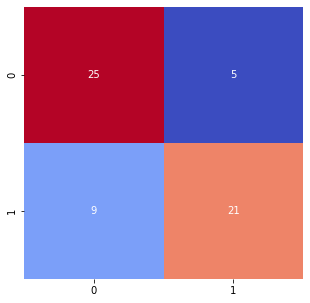

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [ ]:
acc = metrics.accuracy_score(y_test,preds)
acc

0.7666666666666667

In [ ]:
indexes = np.random.randint(0,30,25)
indexes

array([ 7, 12, 29,  2,  2, 12,  2,  9,  6, 27, 20, 17,  9,  9,  5,  0, 23,
       20, 12, 26, 23,  2,  7,  5, 13])

#Testing the Model

In [ ]:
testingPaths = list(paths.list_images(path_testing_data))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False) 
images = []

for i in idxs:
    # loading the testing image, clone it, and resize it 
    image = cv2.imread(testingPaths[i]) 
    output = image. copy() 
    output = cv2. resize(output, (128, 128))
    
    # pre-processing the image 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
    
    # quantify the image and make predictions based on the extracted 
    # features using the last trained Random Forest 
    features = quantify_image(image) 
    preds = model.predict([features])

    label = label_encoder.inverse_transform(preds)[0]

    # draw the colored class label on the output image and add it to the set of output images 
    if label == "healthy":
        color = (0, 255, 0)  
    else:
        color = (0, 0, 255) 
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2) 
    images.append(output)

##Predicting the model-Accuracy and Confusion Matrix

[[25  5]
 [ 9 21]]
0.7666666666666667
Testing Sensitivity for Random Forest 0.7
Testing Specificity for Random Forest 0.8333333333333334
Testing Precision for Random Forest 0.8076923076923077
Testing accuracy for Random Forest 0.7666666666666667


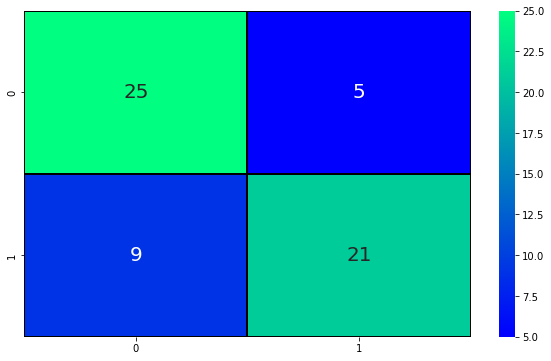

In [ ]:
predictions = model.predict(x_test)    # predictions on the testing data 

cm = confusion_matrix(y_test, predictions)   # computing the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

print(cm) 
(TN, FP, FN, TP) = cm.flatten()

accuracy = (TP + TN) / float(cm.sum())     # computing the accuracy
print(accuracy)

print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, predictions))

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.81      0.70      0.75        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



#Deployment

In [ ]:
pickle.dump(model,open('parkinson.pkl','wb')) 

In [ ]:
!tar -zcvf image-classification-model_new.tgz parkinson.pkl

parkinson.pkl


In [ ]:
ls

image-classification-model_new.tgz  my_model.tar.gz  spiral_wave/
my.model.tar.gz                     parkinson.h5
my__model.tar.gz                    parkinson.pkl


In [ ]:
!pip install watson-machine-learning-client --upgrade

In [ ]:
#Replace the credentials that you got from watson Machine Learning Service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey": "8QLMqsHMjuR6Z0k647bSq0cesTXqS0PX83hcb60OdJhP"
                  }
client = APIClient(wml_credentials)

In [ ]:
client = APIClient(wml_credentials)

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------------------  ------------------------
ID                                    NAME                                                CREATED
edb8e45d-9b5f-4ee6-b9e6-9cf791c31343  Detecting Parkinson Disease Using Machine Learning  2022-11-20T07:24:21.869Z
------------------------------------  --------------------------------------------------  ------------------------


In [ ]:
space_id = guid_from_space_name(client,'Detecting Parkinson Disease Using Machine Learning')
print('Space UID = ' + space_uid)

Space UID = edb8e45d-9b5f-4ee6-b9e6-9cf791c31343


In [ ]:
client.set.default_space(space_id)

'SUCCESS'

In [ ]:
client.set.default_space(space_id)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9") 
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [ ]:
 model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={ 
     client.repository.ModelMetaNames.NAME: "CNN",
     client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_uid(model_details)
 

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [ ]:
DEPLOYMENT_NAME="Detecting Parkinson Disease Using Machine Learning"
DEMO_MODEL=model

In [ ]:
model_details
model_id=client.repository.get_model_id(model_details)
dep_props={
 client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [ ]:
deployment=client.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '6a4ca201-569f-4a64-bd5a-d5aeb29d2e28' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='bf71c28e-eeff-47c2-9fa3-26386b134263'
------------------------------------------------------------------------------------------------


